## 数据探索

**实验任务：**探索泰坦尼克号乘客数据集的各变量情况

**实验课时：**1课时

**实验目的：**
* 了解数据探索在机器学习中的作用；
* 熟悉数据探索的常用方法；
* 掌握数值分布和缺失值统计的实现方法；
* 掌握数据探索常用图表的实现方法；
* 掌握相关性计算的实现方法。

本章节主要介绍使用Python中的程序包`sklearn`（Scikit-learn）做机器学习。该程序包可以用于做数据的预处理、后处理、特征工程、模型训练、超参数调优、模型测试和模型评估，用户只需要简单的调用`sklearn`里的模块就可以实现这些功能，并不需要具体实现所有的算法。

本章所有例子基于一个泰坦尼克号乘客数据集，预测泰坦尼克号乘客的命运（是否生存），包含了将近80%乘客的信息和生存状态，包含1,309个记录，每个记录包含14个属性，如下表所示。

属性  | 定义 
------|------
pclass  | 舱位（“1st”为一等舱，“2nd”为二等舱，“3rd”为三等舱）  
survived  | 是否生存（1为生存，0为未生存）      
name | 乘客姓名      
sex  | 性别      
age  | 年龄      
sibsp  | 在船上的配偶和兄弟姐妹数量      
parch  | 在船上的父母和子女数量      
ticket  | 船票号码      
fare  | 票价      
cabin  | 房间号      
embarked  | 登船地点      
boat  | 救生船号码      
body  | 尸体编号      
home.dest  | 家乡 

在做进一步数据建模前，首先需要对数据变量名、数值分布和缺失值情况等等有初步了解。

该数据集的路径存储在对象`titanic3_file_path`中。

载入需要用到的程序包。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [6]:
titanic3_file_path="./titanic3.xls"
titanic3 = pd.read_excel(titanic3_file_path)
titanic3.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


使用数据框的属性shape得到数据框的样本数和变量数。

In [8]:
titanic3.shape

(1309, 14)

调用数据框的函数`describe()`得到数据框中各列的统计信息，包括数据集中变量名、非缺失值的数量（`count`）、独立值数量（`unique`）、众数（出现频率最高的数值）（`top`）、众数出现的数量（`freq`）、均值（`mean`）、标准差（`std`）、最小值（`min`）、第25百分位数（`25%`）、第50百分位数（`50%`）、第75百分位数（`75%`）和最大值（`max`），其中

* 参数`include`表示包含的数据类型，`'all'`为包含所有变量，`None`为仅包含数值型变量，默认为`None`。

In [10]:
titanic3.describe(include = 'all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3,28,NaN,369
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


可以看出，

* 3个变量`age`、`fare`和`body`存在缺失值；
* 变量`fare`的最大和最小值差异较大。

调用序列的函数`value_counts()`得到该变量各离散值的数量，这里查看一等舱、二等舱和三等舱的数量。

In [14]:
titanic3['pclass'].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

调用数据框的函数`hist()`绘制所有数值型变量的直方图查看数值分布。

<Figure size 432x288 with 0 Axes>

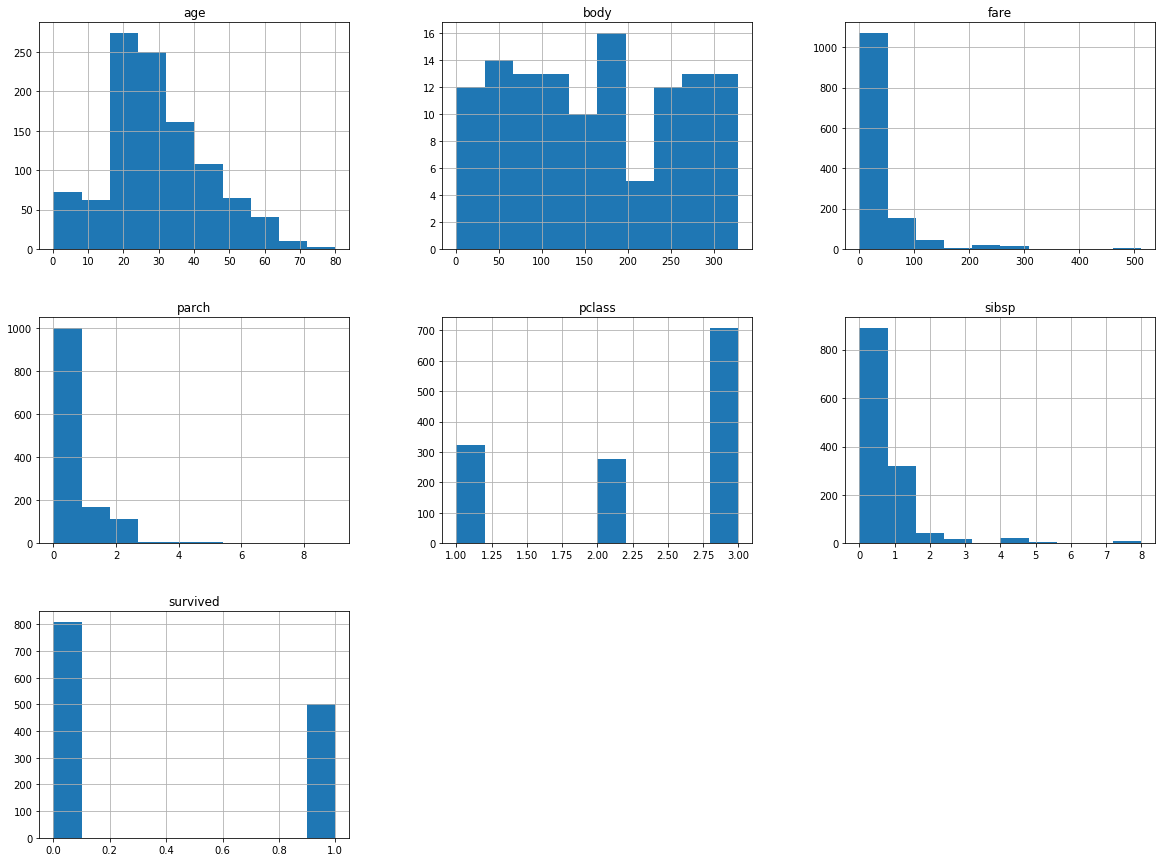

In [16]:
plt.figure()
titanic3.hist(bins=10, figsize=(20,15))
plt.show()


也可以调用数据框的函数`boxplot()`画出所有数值型变量的箱形图查看数值分布和异常值。

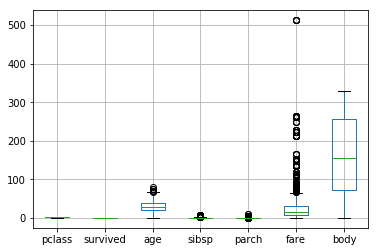

In [18]:
plt.figure()
titanic3.boxplot()
plt.show()

调用程序包`pandas.plotting`的函数`scatter()`绘制多个数值型变量的散点图查看各变量的相关性。
* frame：(DataFrame)，DataFrame对象
* alpha：(float, 可选)， 图像透明度，一般取(0,1]
* figsize: ((float,float), 可选)，以英寸为单位的图像大小，一般以元组 (width, height) 形式设置
* ax：(Matplotlib axis object, 可选)，一般取None
* diagonal：({‘hist’, ‘kde’})，必须且只能在{‘hist’, ‘kde’}中选择1个，’hist’表示直方图(Histogram plot),’kde’表示核密度估计(Kernel Density Estimation)；该参数是scatter_matrix函数的关键参数，
* marker：(str, 可选)， Matplotlib可用的标记类型，如’.’，’,’，’o’等
* density_kwds：(other plotting keyword arguments，可选)，与kde相关的字典参数
* hist_kwds：(other plotting keyword arguments，可选)，与hist相关的字典参数
* range_padding：(float, 可选)，图像在x轴、y轴原点附近的留白(padding)，该值越大，留白距离越大，图像远离坐标原点
* kwds：(other plotting keyword arguments，可选)，与scatter_matrix函数本身相关的字典参数

<Figure size 432x288 with 0 Axes>

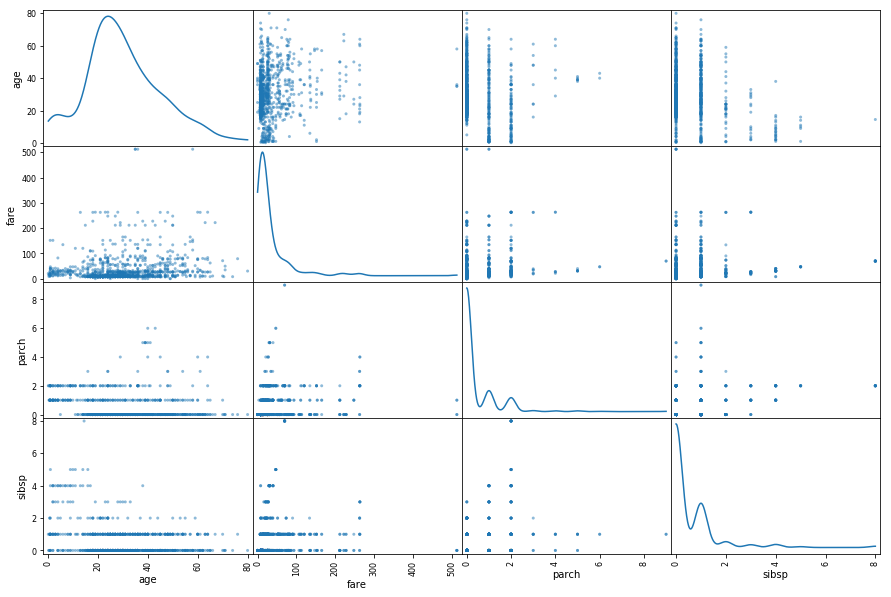

In [19]:
plt.figure()
scatter_matrix(titanic3[['age','fare','parch','sibsp']], figsize = (15, 10), diagonal = "kde")
plt.show()

调用数据框的函数`corr()`计算所有数值型变量（除变量`body`）的相关性系数，其中第1个参数`method`表示相关性系数的计算方法，`'pearson'`为皮尔森相关性系数， `'kendall'`为肯德尔相关性系数，`'spearman'`为斯皮尔曼相关性系数。

对于变量$X$和$Y$，它们的皮尔森相关性系数定义为

$$ \rho_{X,Y} = \frac{\sum(X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum(X_i - \bar{X})^2 \sum(Y_i -\bar{Y})^2} } $$

In [20]:
correlations = titanic3.drop('body', 1).corr()
correlations

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000


调用相关性系数矩阵的函数`style.background_gradient()`绘制相关系数矩阵的热力图，相关性越大则颜色越红，否则颜色越蓝。

In [21]:
titanic3.drop('body', 1).corr().style.background_gradient(cmap='coolwarm')

,pclass,survived,age,sibsp,parch,fare
pclass,1,-0.312469,-0.408106,0.060832,0.0183222,-0.558629
survived,-0.312469,1,-0.0555125,-0.0278251,0.0826596,0.244265
age,-0.408106,-0.0555125,1,-0.243699,-0.150917,0.178739
sibsp,0.060832,-0.0278251,-0.243699,1,0.373587,0.160238
parch,0.0183222,0.0826596,-0.150917,0.373587,1,0.221539
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1
